### Importing necessary libraries/packages

In [1]:
import numpy as np
import pandas as pd
from pprint import pprint
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
plt.style.use ('ggplot')

### Loading iris dataset iris

In [2]:
iris = datasets.load_iris ()
print (type (iris))
pprint (iris) # overview wiht the actual data of iris

<class 'sklearn.utils.Bunch'>
{'DESCR': 'Iris Plants Database\n'
          '====================\n'
          '\n'
          'Notes\n'
          '-----\n'
          'Data Set Characteristics:\n'
          '    :Number of Instances: 150 (50 in each of three classes)\n'
          '    :Number of Attributes: 4 numeric, predictive attributes and the '
          'class\n'
          '    :Attribute Information:\n'
          '        - sepal length in cm\n'
          '        - sepal width in cm\n'
          '        - petal length in cm\n'
          '        - petal width in cm\n'
          '        - class:\n'
          '                - Iris-Setosa\n'
          '                - Iris-Versicolour\n'
          '                - Iris-Virginica\n'
          '    :Summary Statistics:\n'
          '\n'
          '    ============== ==== ==== ======= ===== ====================\n'
          '                    Min  Max   Mean    SD   Class Correlation\n'
          '    ============== ==== ====

#### Important data

In [3]:
print (iris.keys ())
print (iris.feature_names) # feature names
print (iris.target_names) # labels 
print (iris.data) # actual data corresping to feature names
print (iris.target) # corresponding labels (actual)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1

### Creating DataFrame to plot data of iris dataset in a scatter plot

In [4]:
df = pd.DataFrame (iris.data, columns = iris.feature_names)
# print (df.describe ()) given in the documentation of the iris dataset
print (df.info ())
df.head ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB
None


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
col_dict = {0: 'r', 1: 'g', 2: 'b'}
colr = [col_dict[i] for i in iris.target]
print (colr)

['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']


***List Comprehension***: generating a list by using an iterable

Eg. in the above cell, col_dict is used to generate a list colr which gives colours correspong to iris.target

### Plotting:

1. sepal length (cm) v/s sepal width (cm)

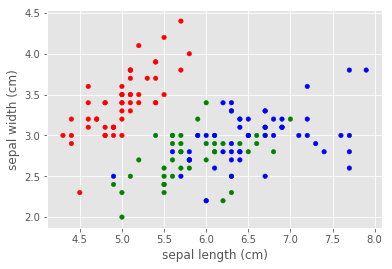

In [6]:
df.plot (kind = 'scatter', x = 'sepal length (cm)', y = 'sepal width (cm)', color = colr)

2. petal length (cm) v/s petal width (cm)

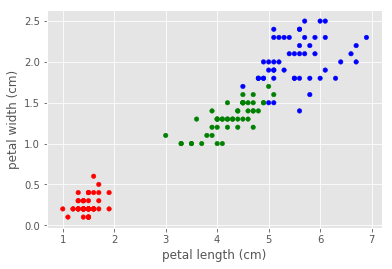

In [7]:
df.plot (kind = 'scatter', x = 'petal length (cm)', y = 'petal width (cm)', color = colr)
# documentation gave a high class correlation for petal length and petal width

3. sepal length (cm) v/s petal width (cm)

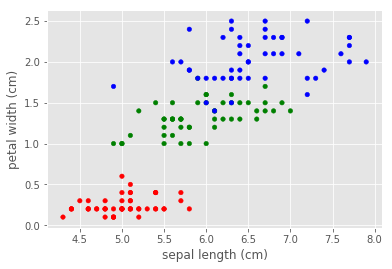

In [8]:
df.plot (kind = 'scatter', x = 'sepal length (cm)', y = 'petal width (cm)', color = colr)

4. petal length (cm) v/s sepal widht (cm)

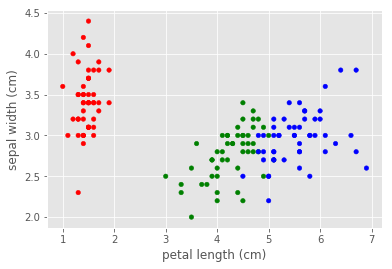

In [9]:
df.plot (kind = 'scatter', x = 'petal length (cm)', y = 'sepal width (cm)', color = colr)

### Using KNeighborsClassifier to train the computer...?

In [10]:
knn = KNeighborsClassifier (n_neighbors = 10) # creating knn object with argument n_neighbors
knn.fit (iris.data, iris.target) # training the computer on the data model
print (iris.data.shape)
print (iris.target.shape)

(150, 4)
(150,)


#### Predicting on the original dataset

In [11]:
prediction = knn.predict (iris.data) # predicting
print (iris.target)
print (prediction)
print (knn.score (iris.data, iris.target)) # finding accuracy of prediction

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2]
0.98


### Model accuracy reason

Since the computer was trained on iris.data and then was used to predict the targets using the exact same data, the data model score is high. It's a good measure to see if the computer can predict from the original dataset, but in general it's a bad method. Since we want to train the computer to predict the targets for new data this method is flawed.

#### Training computer on a dataset with uneven distribution

In [12]:
# 100 rows used for training, remaining 50 used for predicting
train_data = iris.data[:100, :]
test_data = iris.data[100:, :]
train_target = iris.target[:100]
test_target = iris.target[100:]

# print (train_data) 
# print (test_data)
print (train_target)
print (test_target)

# one can see how the computer might make incorrect predictions

knn = KNeighborsClassifier (n_neighbors = 10) 
knn.fit (train_data, train_target) # training on train_data and corresponding train_target
predictions = knn.predict (test_data) # predicting targets using test_data
print (predictions)
print (knn.score (test_data, test_target)) # finding accuracy of prediction 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.0


In [13]:
# 70% of setosa class, 20% of versicolor class and 10% f virginica class used for training
# initializing data and targets to be passed to knn.fit object
data_arr = np.zeros ((50, 4))
data_arr[:35, :] = iris.data[:35, :].copy ()
data_arr[35:45, :] = iris.data[50:60, :].copy ()
data_arr[45:, :] = iris.data[100:105, :].copy ()

target_arr = np.zeros ((50))
# skipping the first 35 rows since they are already 0
target_arr[35:45] = iris.target[50:60].copy ()
target_arr[45:] = iris.target[100:105].copy ()

# print (data_arr[:10, :])
print (target_arr)

# initializing test_data to be passed to knn.predict object 
test_data = np.zeros ((20, 4))
test_data[:, :] = iris.data[130:, :].copy ()

# initializing target to be passed to knn.score object
test_target = np.zeros ((20))
test_target[:] = iris.target[130:].copy ()

# print (test_data[:10, :])
print (test_target)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2.
 2. 2.]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


In [14]:
knn = KNeighborsClassifier (n_neighbors = 10)
knn.fit (data_arr, target_arr)
predictions = knn.predict (test_data)
print (predictions)
print (knn.score (test_data, test_target))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.0


Setting n_neighbors to 10 yeilds a score of 0.

### Splitting dataset in 70/30 in a random way

Using train_test_split ()
```
from sklearn.model_selection import test_train_split 
```

*Note*: data distribution is unchanged.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (iris.data, iris.target, test_size = 0.3, random_state = 10)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)
print (Y_train)
print (Y_test)

(105, 4) (105,)
(45, 4) (45,)
[0 1 1 2 2 1 2 1 1 1 0 0 1 0 2 0 0 2 1 2 0 2 0 1 1 0 2 2 2 2 2 0 1 2 1 0 2
 1 1 0 0 0 1 2 2 1 0 0 0 2 2 1 1 2 2 2 2 1 0 0 1 0 0 2 1 0 0 0 1 0 1 0 1 2
 0 1 1 2 0 2 0 1 1 2 2 0 1 2 2 1 1 2 0 2 0 0 1 0 2 2 2 1 0 2 0]
[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 1]


Dataset is split evenly and targets are also arranged differently.

In [16]:
# training and predicting
knn = KNeighborsClassifier (n_neighbors = 10)
knn.fit (X_train, Y_train)
predict = knn.predict (X_test)
print (predict)
print (Y_train)
print (knn.score (X_test, Y_test))

[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 1 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 1]
[0 1 1 2 2 1 2 1 1 1 0 0 1 0 2 0 0 2 1 2 0 2 0 1 1 0 2 2 2 2 2 0 1 2 1 0 2
 1 1 0 0 0 1 2 2 1 0 0 0 2 2 1 1 2 2 2 2 1 0 0 1 0 0 2 1 0 0 0 1 0 1 0 1 2
 0 1 1 2 0 2 0 1 1 2 2 0 1 2 2 1 1 2 0 2 0 0 1 0 2 2 2 1 0 2 0]
0.9777777777777777


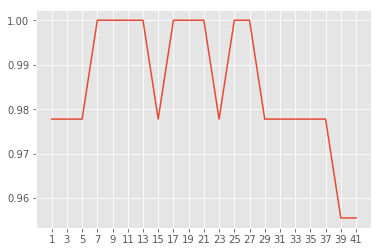

In [17]:
scores = []
for i in range (1, 43, 2):
    knn = KNeighborsClassifier (n_neighbors = i)
    knn.fit (X_train, Y_train)
    scores.append(knn.score(X_test, Y_test))
x = np.arange (1, 43, 2)
plt.xticks (x)
plt.plot (x, scores)
plt.show ()
# min n_neighbors in (7, 8)